<a href="https://colab.research.google.com/github/paphaweekku/bi/blob/main/projectbi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Mar 10 18:05:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0              44W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/bi_data/Alldata/Export_Data.csv', encoding='utf-8')

In [ ]:
df

,Export_Value,Growth_Rate,Month,Year,ProductName,CountryName,Product_Type,Date,GDP_PerCapita,GDP_Growth(%),GDP
0,0,0.0,January,2017,ตลับลูกปืน,สหรัฐอาหรับเอมิเรตส์,สินค้าอุตสาหกรรม,2017-01-01 00:00:00.000,6437.0,0.0418,4.563600e+11
1,0,0.0,January,2017,ตลับลูกปืน,สหรัฐอาหรับเอมิเรตส์,สินค้าอุตสาหกรรม,2017-01-01 00:00:00.000,6437.0,0.0418,4.563600e+11
2,0,0.0,January,2017,ตลับลูกปืน,สหรัฐอาหรับเอมิเรตส์,สินค้าอุตสาหกรรม,2017-01-01 00:00:00.000,6437.0,0.0418,4.563600e+11
3,0,0.0,January,2017,ตลับลูกปืน,สหรัฐอาหรับเอมิเรตส์,สินค้าอุตสาหกรรม,2017-01-01 00:00:00.000,6437.0,0.0418,4.563600e+11
4,0,0.0,January,2017,ตลับลูกปืน,แอนติกัวและบาร์บูดา,สินค้าอุตสาหกรรม,2017-01-01 00:00:00.000,6437.0,0.0418,4.563600e+11
...,...,...,...,...,...,...,...,...,...,...,...
3743911,31160,0.0,November,2022,พัดลม,อุซเบกิสถาน,สินค้าอุตสาหกรรม,2022-11-01 00:00:00.000,6909.0,0.0259,4.953400e+11
3743912,6413716,0.0,October,2022,ตู้เย็น ตู้แช่แข็งและส่วนประกอบ,อุซเบกิสถาน,สินค้าอุตสาหกรรม,2022-10-01 00:00:00.000,6909.0,0.0259,4.953400e+11
3743913,667894,0.0,September,2022,ผลิตภัณฑ์เภสัชภัณฑ์,อุซเบกิสถาน,สินค้าอุตสาหกรรม,2022-09-01 00:00:00.000,6909.0,0.0259,4.953400e+11
3743914,7880,0.0,October,2022,แก้วและกระจก,อุซเบกิสถาน,สินค้าอุตสาหกรรม,2022-10-01 00:00:00.000,6909.0,0.0259,4.953400e+11


In [ ]:
df_selected = df[['Year', 'Month', 'Export_Value']]
df_selected

,Year,Month,Export_Value
0,2017,January,0
1,2017,January,0
2,2017,January,0
3,2017,January,0
4,2017,January,0
...,...,...,...
3743911,2022,November,31160
3743912,2022,October,6413716
3743913,2022,September,667894
3743914,2022,October,7880


In [ ]:
df_selected['MonthID'] = pd.to_datetime(df_selected['Month'], format='%B').dt.month
df_selected['Year_Month'] = df_selected['Year'].astype(str) + '-' + df_selected['MonthID'].astype(str)
df_selected = df_selected.drop(['Year', 'Month','MonthID'], axis=1)
df_selected

<ipython-input-178-b516122cff3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['MonthID'] = pd.to_datetime(df_selected['Month'], format='%B').dt.month
<ipython-input-178-b516122cff3f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Year_Month'] = df_selected['Year'].astype(str) + '-' + df_selected['MonthID'].astype(str)


,Export_Value,Year_Month
0,0,2017-1
1,0,2017-1
2,0,2017-1
3,0,2017-1
4,0,2017-1
...,...,...
3743911,31160,2022-11
3743912,6413716,2022-10
3743913,667894,2022-9
3743914,7880,2022-10


In [ ]:
df_selected['Year_Month']=pd.to_datetime(df_selected['Year_Month'])
df_selected = df_selected[['Year_Month', 'Export_Value']]
df_selected

,Year_Month,Export_Value
0,2017-01-01,0
1,2017-01-01,0
2,2017-01-01,0
3,2017-01-01,0
4,2017-01-01,0
...,...,...
3743911,2022-11-01,31160
3743912,2022-10-01,6413716
3743913,2022-09-01,667894
3743914,2022-10-01,7880


In [ ]:
df_selected.set_index('Year_Month',inplace=True)

In [ ]:
df_grouped = df_selected.groupby('Year_Month')['Export_Value'].sum().to_frame()


<Axes: xlabel='Year_Month'>

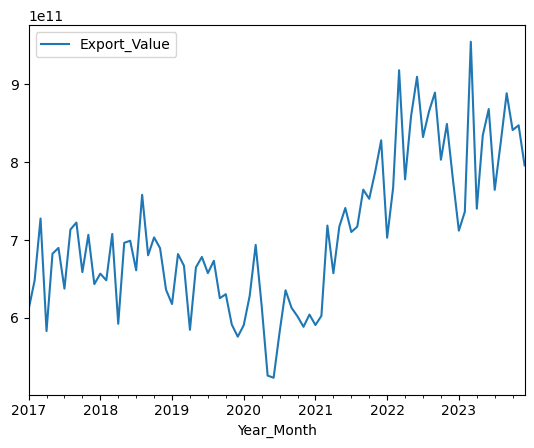

In [ ]:
df_grouped.plot()

In [ ]:
df_selected

,Export_Value
Year_Month,
2017-01-01,0
2017-01-01,0
2017-01-01,0
2017-01-01,0
2017-01-01,0
...,...
2022-11-01,31160
2022-10-01,6413716
2022-09-01,667894


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df_grouped['Export_Value'])

In [ ]:
def adfuller_test(exportvalue):
    result=adfuller(exportvalue)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [ ]:
adfuller_test(df_grouped['Export_Value'])

ADF Test Statistic : -1.0779439047414527
p-value : 0.7237870055386116
#Lags Used : 12
Number of Observations Used : 71
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
df_grouped['Export First Difference'] = df_grouped['Export_Value'] - df_grouped['Export_Value'].shift(1)


In [ ]:
df_grouped.shift(1)

,Export_Value,Export First Difference
Year_Month,,
2017-01-01,NaN,NaN
2017-02-01,6.106611e+11,NaN
2017-03-01,6.475792e+11,3.691811e+10
2017-04-01,7.275843e+11,8.000509e+10
2017-05-01,5.828658e+11,-1.447185e+11
...,...,...
2023-08-01,7.644440e+11,-1.039441e+11
2023-09-01,8.249380e+11,6.049398e+10
2023-10-01,8.886656e+11,6.372753e+10


In [ ]:
df_grouped['Seasonal First Difference'] = df_grouped['Export_Value'] - df_grouped['Export_Value'].shift(12)
df_grouped.head(15)

,Export_Value,Export First Difference,Seasonal First Difference
Year_Month,,,
2017-01-01,610661112695,NaN,NaN
2017-02-01,647579219077,3.691811e+10,NaN
2017-03-01,727584304333,8.000509e+10,NaN
2017-04-01,582865836259,-1.447185e+11,NaN
2017-05-01,682375319229,9.950948e+10,NaN
2017-06-01,689777738160,7.402419e+09,NaN
2017-07-01,637409795330,-5.236794e+10,NaN
2017-08-01,713464699519,7.605490e+10,NaN
2017-09-01,722387429648,8.922730e+09,NaN


In [ ]:
adfuller_test(df_grouped['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.035251098686982
p-value : 0.03173097102787697
#Lags Used : 11
Number of Observations Used : 60
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Year_Month'>

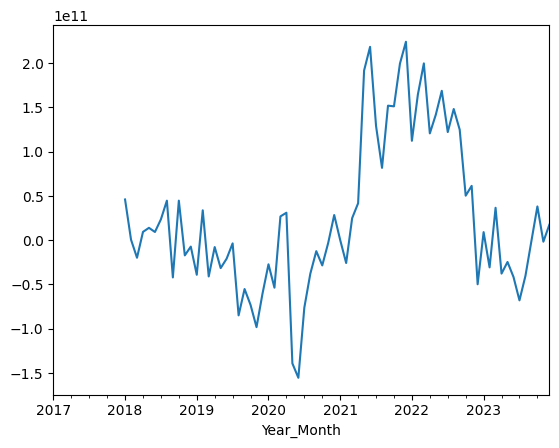

In [ ]:
df_grouped['Seasonal First Difference'].plot()

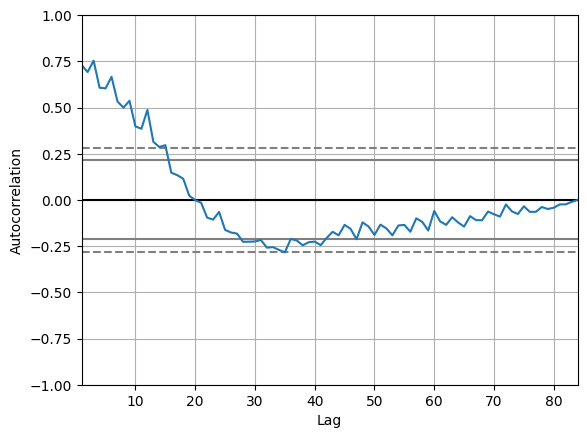

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_grouped['Export_Value'])
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

In [ ]:
max_lags = len(df_grouped['Seasonal First Difference'].iloc[13:]) // 2
max_lags

35

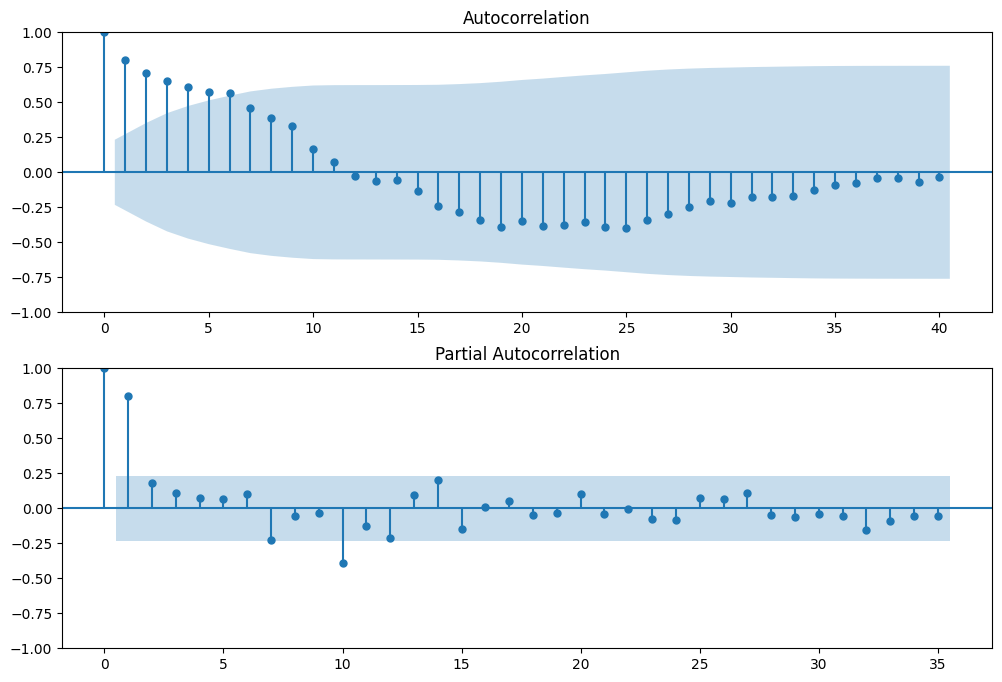

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_grouped['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_grouped['Seasonal First Difference'].iloc[13:],lags=max_lags,ax=ax2)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_grouped['Export_Value'], order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Export_Value   No. Observations:                   84
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2187.587
Date:                Sun, 10 Mar 2024   AIC                           4381.174
Time:                        18:05:32   BIC                           4388.430
Sample:                    01-01-2017   HQIC                          4384.089
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1468      0.135      1.089      0.276      -0.117       0.411
ma.L1         -0.4152      0.133     -3.120      0.002      -0.676      -0.154
sigma2       3.54e+21        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   5.35   Jarque-Bera (JB):                 4.01
Prob(Q):                              0.02   Prob(JB):                         0.13
Heteroskedasticity (H):               1.32   Skew:                             0.40
Prob(H) (two-sided):                  0.47   Kurtosis:                         3.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.61e+61. Standard errors may be unstable.
"""

<Axes: xlabel='Year_Month'>

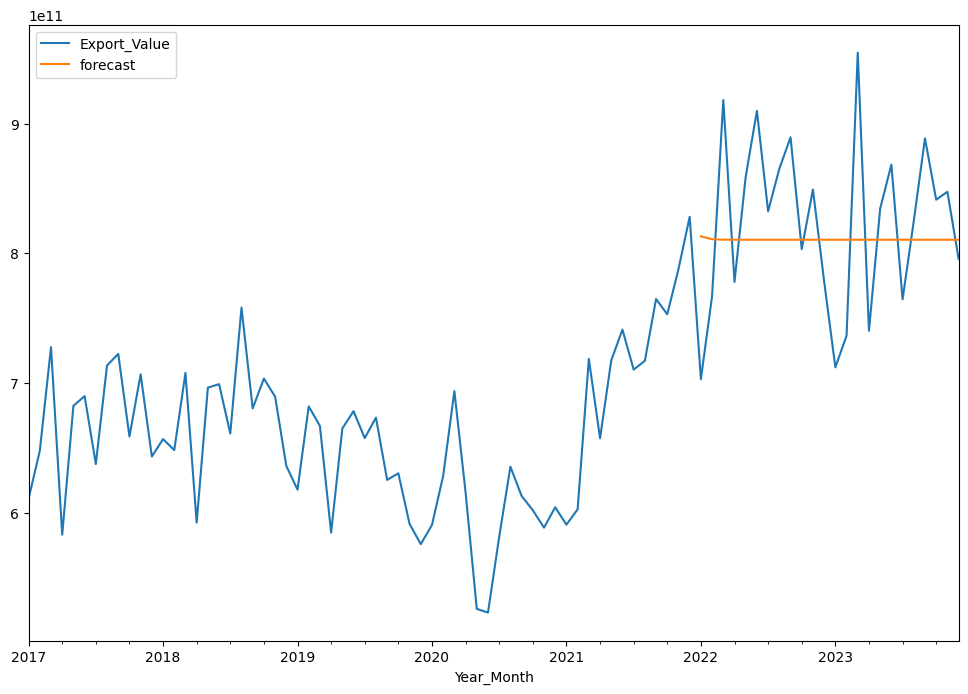

In [ ]:
df_grouped['forecast']=model_fit.predict(start=60,end=83,dynamic=True)
df_grouped[['Export_Value','forecast']].plot(figsize=(12,8))

In [ ]:
model=sm.tsa.statespace.SARIMAX(df_grouped['Export_Value'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Year_Month'>

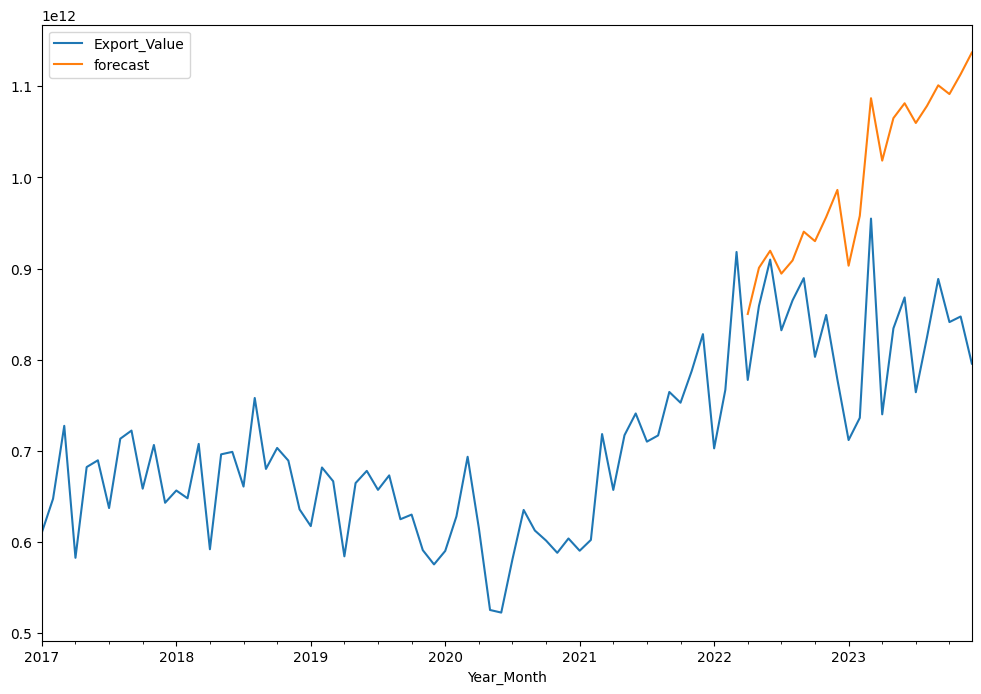

In [ ]:
df_grouped['forecast']=results.predict(start=63,end=83,dynamic=True)
df_grouped[['Export_Value','forecast']].plot(figsize=(12,8))

In [ ]:

from pandas.tseries.offsets import DateOffset
future_dates = [df_grouped.index[-1] + pd.DateOffset(months=x) for x in range(24)]


In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
future_datest_df.tail()

,Export_Value,Growth_Rate,Month,Year,ProductName,CountryName,Product_Type,Date,GDP_PerCapita,GDP_Growth(%),GDP
2025-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
future_df=pd.concat([df_grouped,future_datest_df])

In [ ]:
future_df

,Export_Value,Export First Difference,Seasonal First Difference,forecast,Growth_Rate,Month,Year,ProductName,CountryName,Product_Type,Date,GDP_PerCapita,GDP_Growth(%),GDP
2017-01-01,610661112695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-01,647579219077,3.691811e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-01,727584304333,8.000509e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01,582865836259,-1.447185e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-01,682375319229,9.950948e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

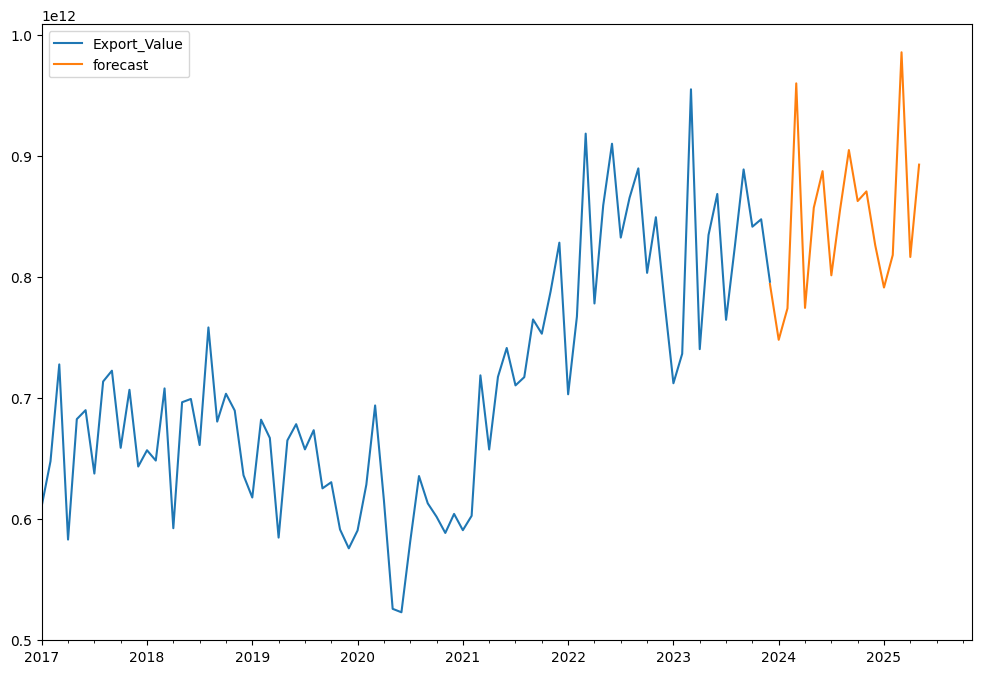

In [ ]:
future_df['forecast'] = results.predict(start = 83, end = 100, dynamic= True)
future_df[['Export_Value', 'forecast']].plot(figsize=(12, 8))

In [ ]:
future_df.to_excel("future_forecast.xlsx", index=False)